# Diagnostic of models

In [1]:
import pandas as pd 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
data = pd.read_csv('C:/Users/Usuario/Desktop/proyectos/Analisis_Financiero_1/Datasets/portfolio_data.csv', index_col=0, parse_dates=True)
#data.head()

In [3]:
model = smf.ols(formula="AMZN~NFLX", data=data).fit()

# Here are estimated intercept and slope by least square estimation 
b0_ols = model.params[0]                                                   # b0_ols = model.params.iloc[0]
b1_ols = model.params[1]                                                   # b1_ols = model.params.iloc[1]

data['BestResponse'] = b0_ols + b1_ols*data['NFLX']

C:\Users\Usuario\AppData\Local\Temp\ipykernel_328\1795964169.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0_ols = model.params[0]                                                   # b0_ols = model.params.iloc[0]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_328\1795964169.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1_ols = model.params[1]                                                   # b1_ols = model.params.iloc[1]


# Assumptions behind linear regression model
1. Linearity 
2. independence
3. Normality
4. Equal Variance

## Linearity

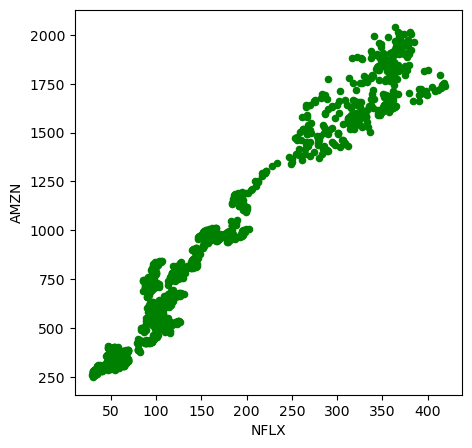

In [4]:
# you can check the scatter plot to have a fast check
data.plot(kind='scatter', x='NFLX', y='AMZN', figsize=(5, 5), color='g')
plt.show()


                                                                          Analisis

La relación entre NFLX y AMZN no parece ser lineal, lo que sugiere que el supuesto de linealidad no se está cumpliendo. Es decir, no se observa una correlación fuerte entre las dos variables.

# Independence

In [5]:
# Get all errors (residuals)
data['error'] = data['AMZN'] - data['BestResponse']

**Method 1: Residual vs order plot**

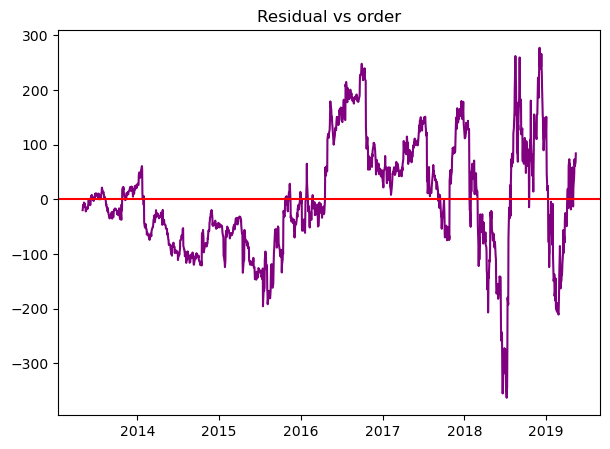

In [6]:
# error vs order plot (Residual vs order) as a fast check 
plt.figure(figsize=(7, 5))
plt.title('Residual vs order')
plt.plot(data.index, data['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

                                                         Analisis

El supuesto de independencia de los errores no se está cumpliendo en este caso.Los residuos no están distribuidos aleatoriamente alrededor de la línea y=0. En lugar de eso, parecen seguir una tendencia temporal: por ejemplo, los residuos son mayormente positivos en algunos años y negativos en otros

**Method 2: Durbin Watson Test**

In [7]:
# Check the Durbin Watson Statistic
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AMZN   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 3.704e+04
Date:                Tue, 01 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:59:23   Log-Likelihood:                -9199.2
No. Observations:                1520   AIC:                         1.840e+04
Df Residuals:                    1518   BIC:                         1.841e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    124.4562      4.482     27.770      0.000     115.665     133.247
NFLX           4.7206      0.025    192.454      0.000       4.673       4.769
==============================================================================
Omnibus:                        4.077   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                4.315
Skew:                           0.067   Prob(JB):                        0.116
Kurtosis:                       3.224   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Normality

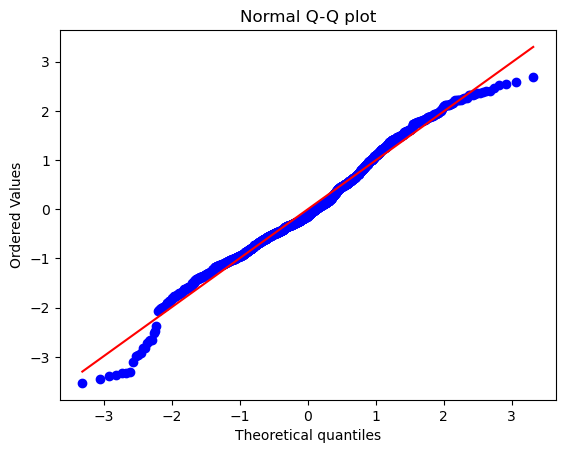

In [8]:
import scipy.stats as stats
z = (data['error'] - data['error'].mean())/data['error'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

                                                                  Analisis

Los puntos no caen exactamente sobre la línea roja, pero están relativamente cerca de ella. Esto sugiere que los residuos aproximadamente siguen una distribución normal, aunque no de manera perfecta. 

# Equal variance

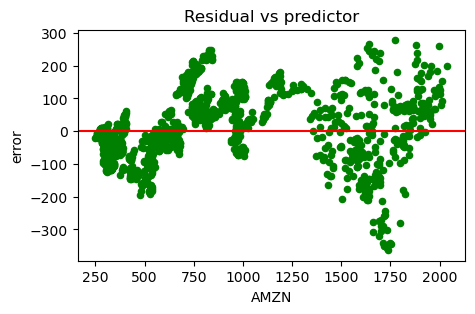

In [9]:
# Residual vs predictor plot
data.plot(kind='scatter', x='AMZN', y='error', figsize=(5, 3), color='green')
plt.title('Residual vs predictor')
plt.axhline(y=0, color='red')
plt.show()

                                                     Analisis 

La dispersión de los residuos aumenta a medida que aumenta el valor de AMZN, lo que le da forma de "embudo". Además , los residuos no están distribuidos de manera uniforme alrededor de la línea y=0. En lugar de eso, muestran un patrón en el que la dispersión aumenta con AMZN. Esto es un signo claro de heterocedasticidad (varianza no constante). 

**Conclusión:  no podemos usar este modelo de predición**